In [1]:
# 라이브러리 불러오기 
import seaborn as sns 

# 데이터셋 가져오기 
titanic = sns.load_dataset('titanic')

In [25]:
# 데이터셋 살펴보기 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

# 총 891개의 로우와 15개의 컬럼으로 구성 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 회귀선이 있는 산점도

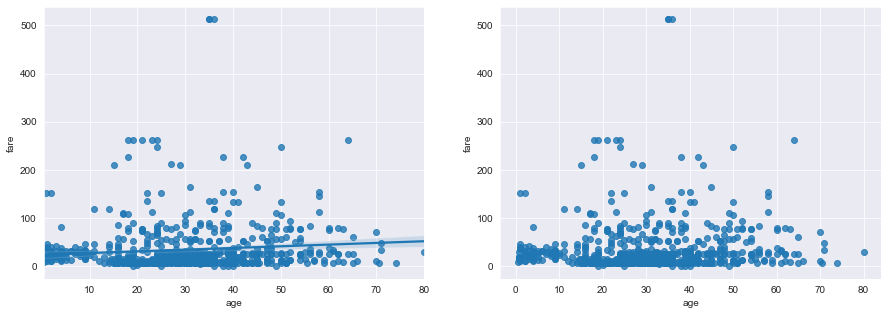

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

titainc = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age', #x축 변수
            y='fare', #y축 변수
            data=titanic, # 데이터
            ax=ax1)
            
 # 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age', 
             y='fare', 
             data=titanic, 
             fit_reg=False) 
    
plt.show()

## 히스토그램/ 커널 밀도함수

d:\data_anal\mlpda\.env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\data_anal\mlpda\.env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\data_anal\mlpda\.env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

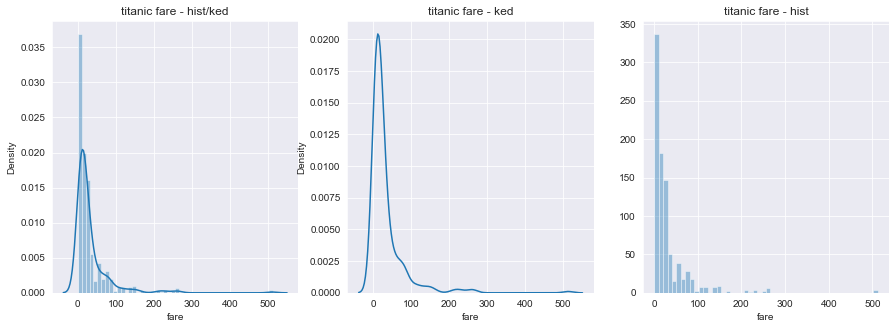

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 

titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid,whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값 
sns.distplot(titanic['fare'], ax=ax1)

# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2)

# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3)

# 차트제목 표시 
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

### 히트맵

Seaborn 라이브러리는 히트맵(heatmap)을 그리는 heatmap() 메소드를 제공한다. 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류한다. 데이터프레임을 피벗테이블로 정리할 때 한 변수('sex'열)를 행 인덱스로 나머지 변수('class'열)를 열 이름으로 설정한다. aggfunc='size' 옵션은 데이터 값의 크기를 기준으로 집계한다는 뜻이다.

히트맵을 그려보면 타이타닉호에는 여자승객보다 남자승객이 상대적으로 많은 편이다. 특히 3등석 남자 승객의 수가 압도적으로 많다. 여기서 cbar=False옵션을 사용하여 컬러 바가 표시되지 않았는데, cbar=True옵션으로 표시할 수 있다.

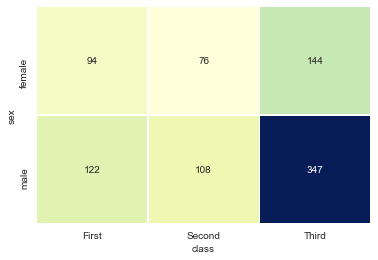

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('dark')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                    # 데이터 프레임            
                annot=True, fmt='d', # 데이터 값 표시 여부, 정수형 포맷 
                cmap='YlGnBu',        # 컬러 맵
                linewidth=.5,         # 구분 선
                cbar=False)           # 컬러 바 표시 여부
                
plt.show()

### 범주형 데이터의 산점도

d:\data_anal\mlpda\.env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


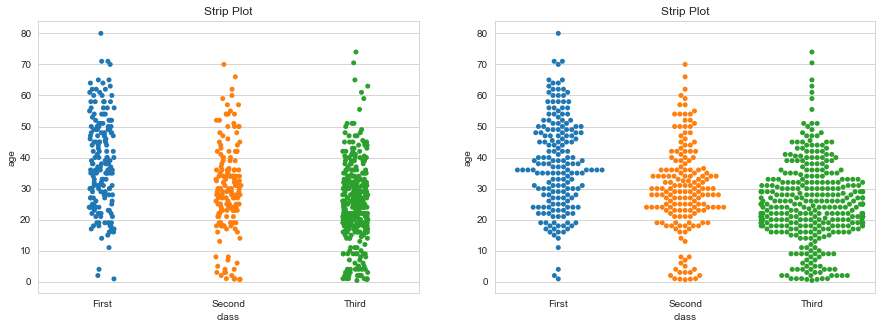

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

# 그래프 객체생성(2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x='class', 
                y='age',
                data=titanic, # 데이터셋 - 데이터 프레임
                ax=ax1) # 1번째 그래프 

# 이산형 변수의 분포 - 데이터 분산 고려(중복 X)
sns.swarmplot(x='class',
                y='age',
                data=titanic, # 데이터셋 - 데이터 프레임
                ax=ax2) # 2번째 그래프

# 차트 제목 표시 
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

### 막대그래프 

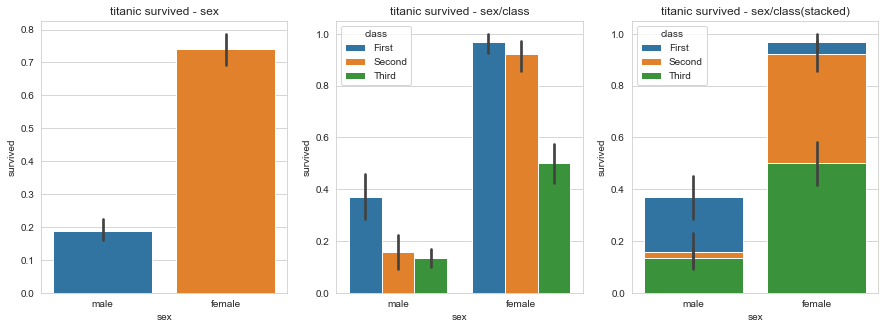

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기 
titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

# create graphs sub-plot objects
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x축 y축에 변수 할당 
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# x,y축에 변수를 할당하고 hue옵션을 추가
sns.barplot(x='sex', y='survived', hue='class', dodge=True, data=titanic, ax=ax2)

# x,y축에 변수를 할당하 hue옵션을 추가하여 누적 출력 
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

### 빈도 그래프

각 범주에 속하는 데이터의 개수를 막대 그래프로 나타내는 countplot() 함수를 소개.
기본설정, hue 옵션 추가, 축 방향으로 hue 변수를 분리하지 않고 위로 쌓아 올리는 누적 그래프로 출력 순으로 실행한다. 

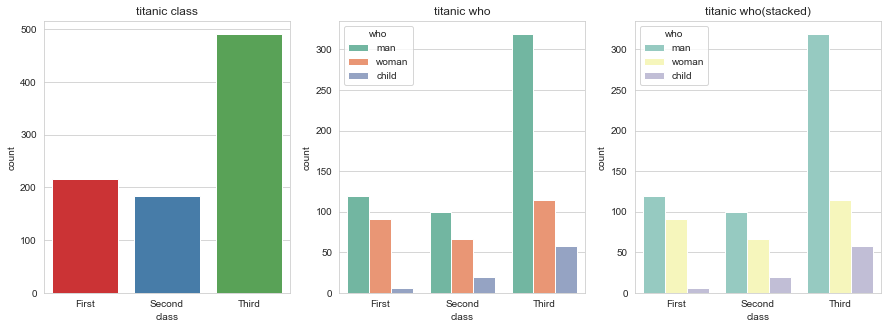

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

sns.countplot(x='class', palette='Set2', hue='who', data=titanic, ax=ax2)

sns.countplot(x='class', palette='Set3', hue='who', dodge=True, data=titanic, ax=ax3)

# 차트제목 표시 
ax1.set_title('titanic class')
ax2.set_title('titanic who')
ax3.set_title('titanic who(stacked)')

plt.show()

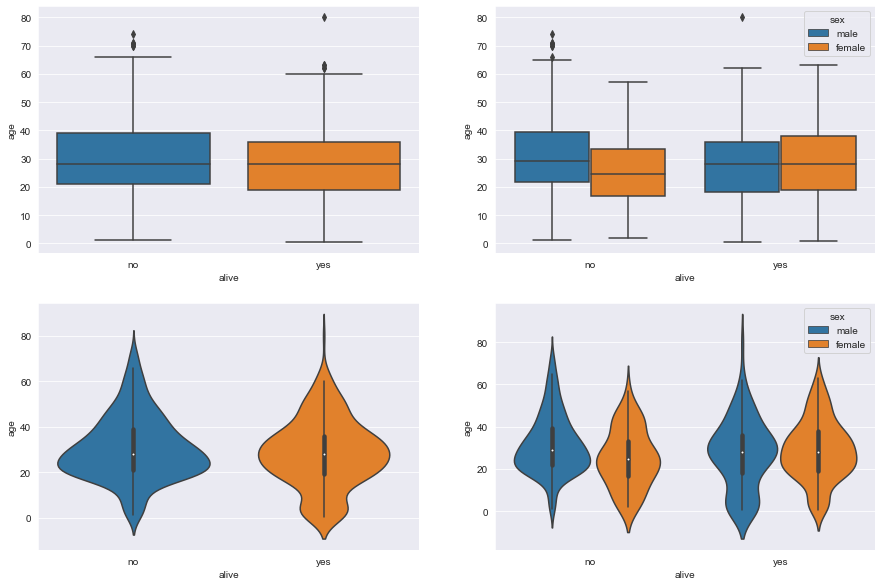

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

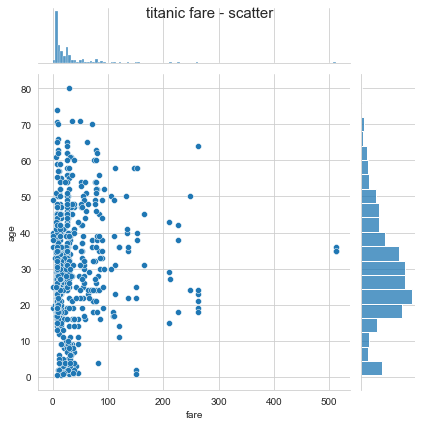

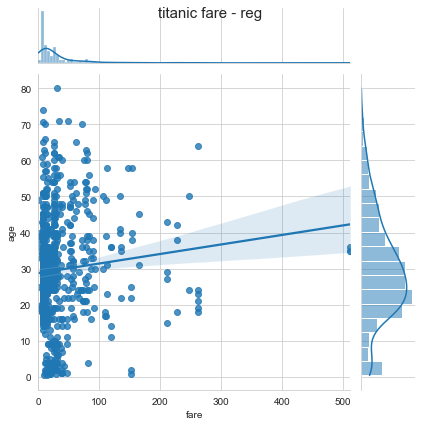

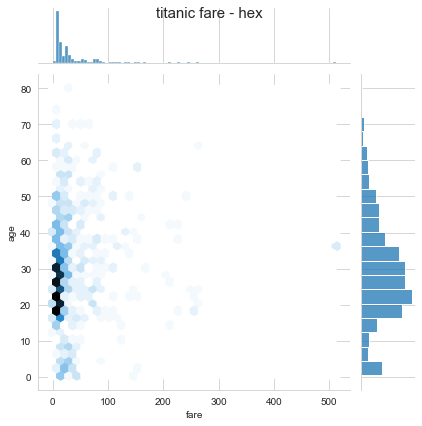

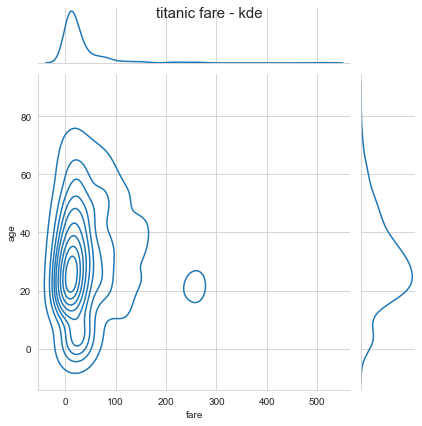

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic) # 산점도
j2 = sns.jointplot(x='fare', y='age', data=titanic, kind='reg')# 회귀선 추가
j3 = sns.jointplot(x='fare', y='age',  data=titanic, kind='hex')# 육각산점도
j4 = sns.jointplot(x='fare', y='age', data=titanic, kind='kde') # 커널 밀집도 그래프

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

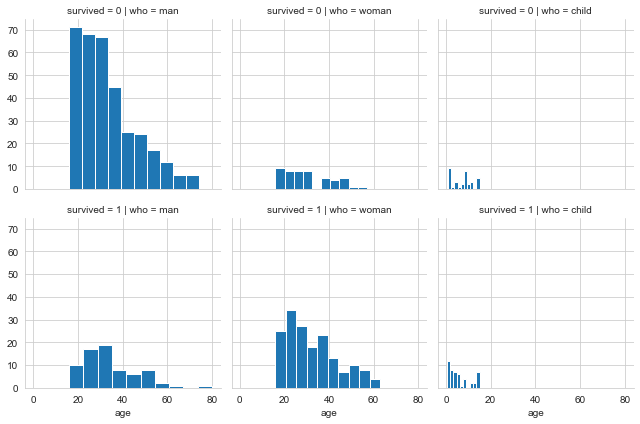

In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

g = sns.FacetGrid(data=titanic, col='who', row='survived')

g = g.map(plt.hist, 'age')


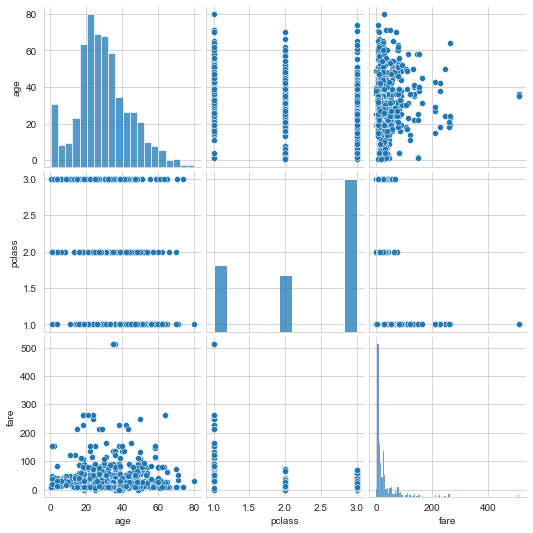

In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

titanic_pair = titanic[['age','pclass','fare']]

g = sns.pairplot(titanic_pair)